<a href="https://colab.research.google.com/github/Dukedennis55/personality-sim-psychiatry/blob/main/demo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mesa==1.1.0



In [2]:
!pip install mesa pandas matplotlib

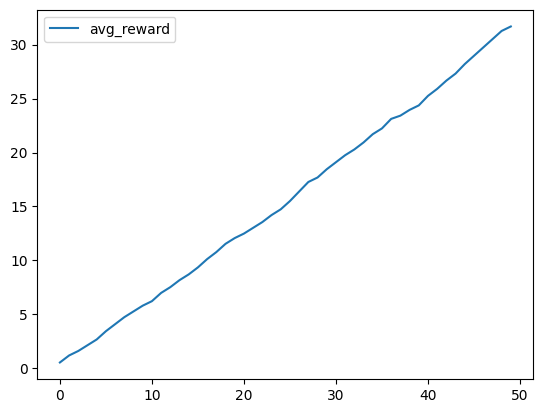

In [3]:
!pip install mesa pandas matplotlib

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
import random
import pandas as pd
import matplotlib.pyplot as plt

class PersonAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.reward = 0

    def step(self):
        # simple decision: random cooperate or defect
        action = 'cooperate' if random.random() < 0.5 else 'defect'
        if action == 'cooperate':
            self.reward += 1
        else:
            self.reward += 0.3

class CrowdModel(Model):
    def __init__(self, N=6, rounds=50):
        self.schedule = RandomActivation(self)
        self.round = 0
        self.rounds = rounds
        self.datacollector = DataCollector(
            model_reporters={"avg_reward": lambda m: pd.Series([a.reward for a in m.schedule.agents]).mean()}
        )
        for i in range(N):
            self.schedule.add(PersonAgent(i, self))

    def step(self):
        self.round += 1
        self.schedule.step()
        self.datacollector.collect(self)
        if self.round >= self.rounds:
            self.running = False

model = CrowdModel()
model.running = True
while model.running:
    model.step()

data = model.datacollector.get_model_vars_dataframe()
data.plot()
plt.show()
